In [1]:
import nltk
import os
import csv

import matplotlib.pyplot as plt

# import ssl
# ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
# Get the current working directory
# Set the path to the file relative to the root directory
# Open the file and read its contents
with open('input/chatgpt.txt', 'r') as file:
    text = file.read()
    
# os.path.join(os.getcwd(), '..', 'input/chatgpt.txt')

In [23]:
# general stats
myText = {}

In [46]:
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

tokens = word_tokenize(text)

# Filter out tokens that contain only punctuation characters
no_punct_tokens = [token for token in tokens if token not in string.punctuation]

stemmer = PorterStemmer()
stemmed_tokens = [stemmer.stem(token) for token in no_punct_tokens]


# TODO check if this is working stopwords??
stopwords = set(stopwords.words('english'))
filtered_stemmed_tokens = [token.lower() for token in stemmed_tokens if token.lower() not in stopwords]

In [65]:
# Write to file
# "output/stemmed_tokens.csv"
with open(os.path.join(os.getcwd(), '..', 'landigest/input/stemmed_tokens.csv'), "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Token", "Stemmed Token"])
    for i in range(len(no_punct_tokens)):
        writer.writerow([no_punct_tokens[i], no_punct_tokens[i]])

In [66]:
# Write to file
# "output/stemmed_tokens.csv"
with open(os.path.join(os.getcwd(), '..', 'output/stemmed_tokens.csv'), "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Token", "Stemmed Token"])
    for i in range(len(no_punct_tokens)):
        writer.writerow([no_punct_tokens[i], no_punct_tokens[i]])

FileNotFoundError: [Errno 2] No such file or directory: '/Users/danigo/devEnv/jhu/proj4/mynewbook/../output/stemmed_tokens.csv'

1469
393
<class 'nltk.probability.FreqDist'>
<class 'list'>


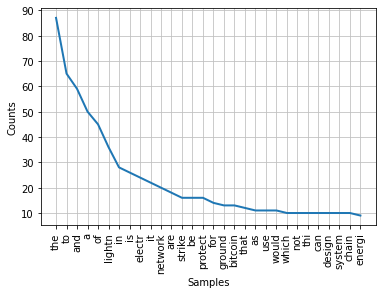

<Axes: xlabel='Samples', ylabel='Counts'>

In [21]:
from nltk import FreqDist

fdist = FreqDist(stemmed_tokens)

print(fdist.N())
print(fdist.B())
# fdist.hapaxes()
#fdist.most_common()
print(type(fdist))
print(type(fdist.most_common()))

fdist.plot(30, cumulative=False)

In [62]:
myText['N'] = fdist.N()
myText['B'] = fdist.B()

# Convert the list of pairs to a dictionary
counts_dict = list(fdist.items())

#print(counts_dict)

In [64]:
# Write to file
with open(os.path.join(os.getcwd(), '..', 'landigest/input/txtSpecs.csv'), "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Token", "Frequency"])
    for item in counts_dict:
        writer.writerow([item[0], item[1]])
        

In [ ]:
# Write to file
with open(os.path.join(os.getcwd(), '..', 'output/txtSpecs.csv'), "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Token", "Frequency"])
    for item in counts_dict:
        writer.writerow([item[0], item[1]])
        

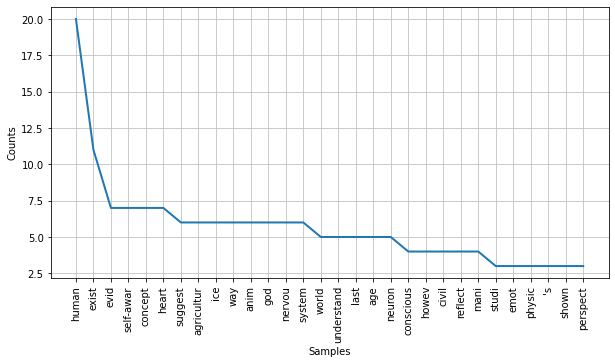

In [9]:
# words = [word.lower() for word in tokens if word.isalpha()]
fdist = FreqDist(stemmed_tokens)
plt.figure(figsize=(10, 5))
fdist.plot(30, cumulative=False)
plt.show()

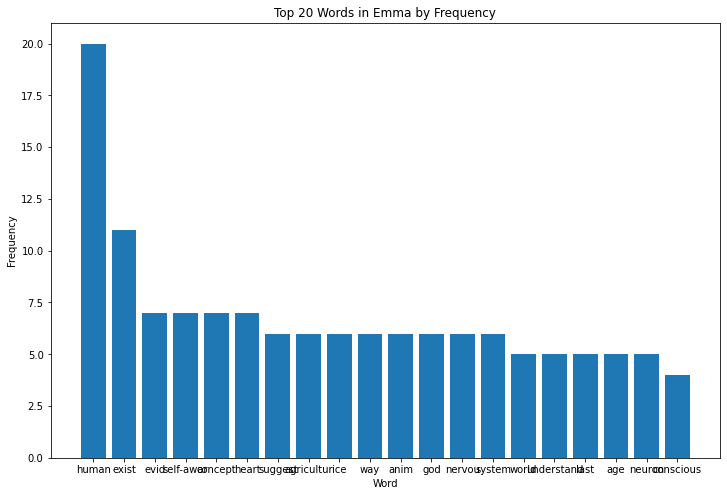

In [10]:
# # Tokenize the text and remove punctuation
# tokens = [word.lower() for word in word_tokenize(text) if word.isalpha()]

# Create a dictionary of word frequencies
freq_dict = {}
for token in stemmed_tokens:
    if token in freq_dict:
        freq_dict[token] += 1
    else:
        freq_dict[token] = 1

# Sort the dictionary by frequency
sorted_dict = sorted(freq_dict.items(), key=lambda x: x[1], reverse=True)

# Get the top 20 words and their frequencies
top_words = [x[0] for x in sorted_dict[:20]]
word_freqs = [x[1] for x in sorted_dict[:20]]

# Create a bar chart of the top 20 words and their frequencies
plt.figure(figsize=(12, 8))
plt.bar(top_words, word_freqs)
plt.title('Top 20 Words in Emma by Frequency')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()

<Axes: title={'center': 'Lexical Dispersion Plot'}, xlabel='Word Offset'>

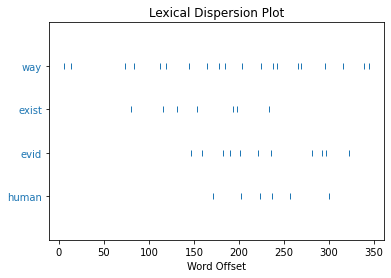

In [16]:
from nltk.draw import dispersion_plot

# Create a list of words to search for
search_words = ['human', 'evid', 'exist', 'way']

# Plot the dispersion of the search words across the corpus by part of speech
dispersion_plot(stemmed_tokens, search_words, ignore_case=True)

<IPython.core.display.Javascript object>


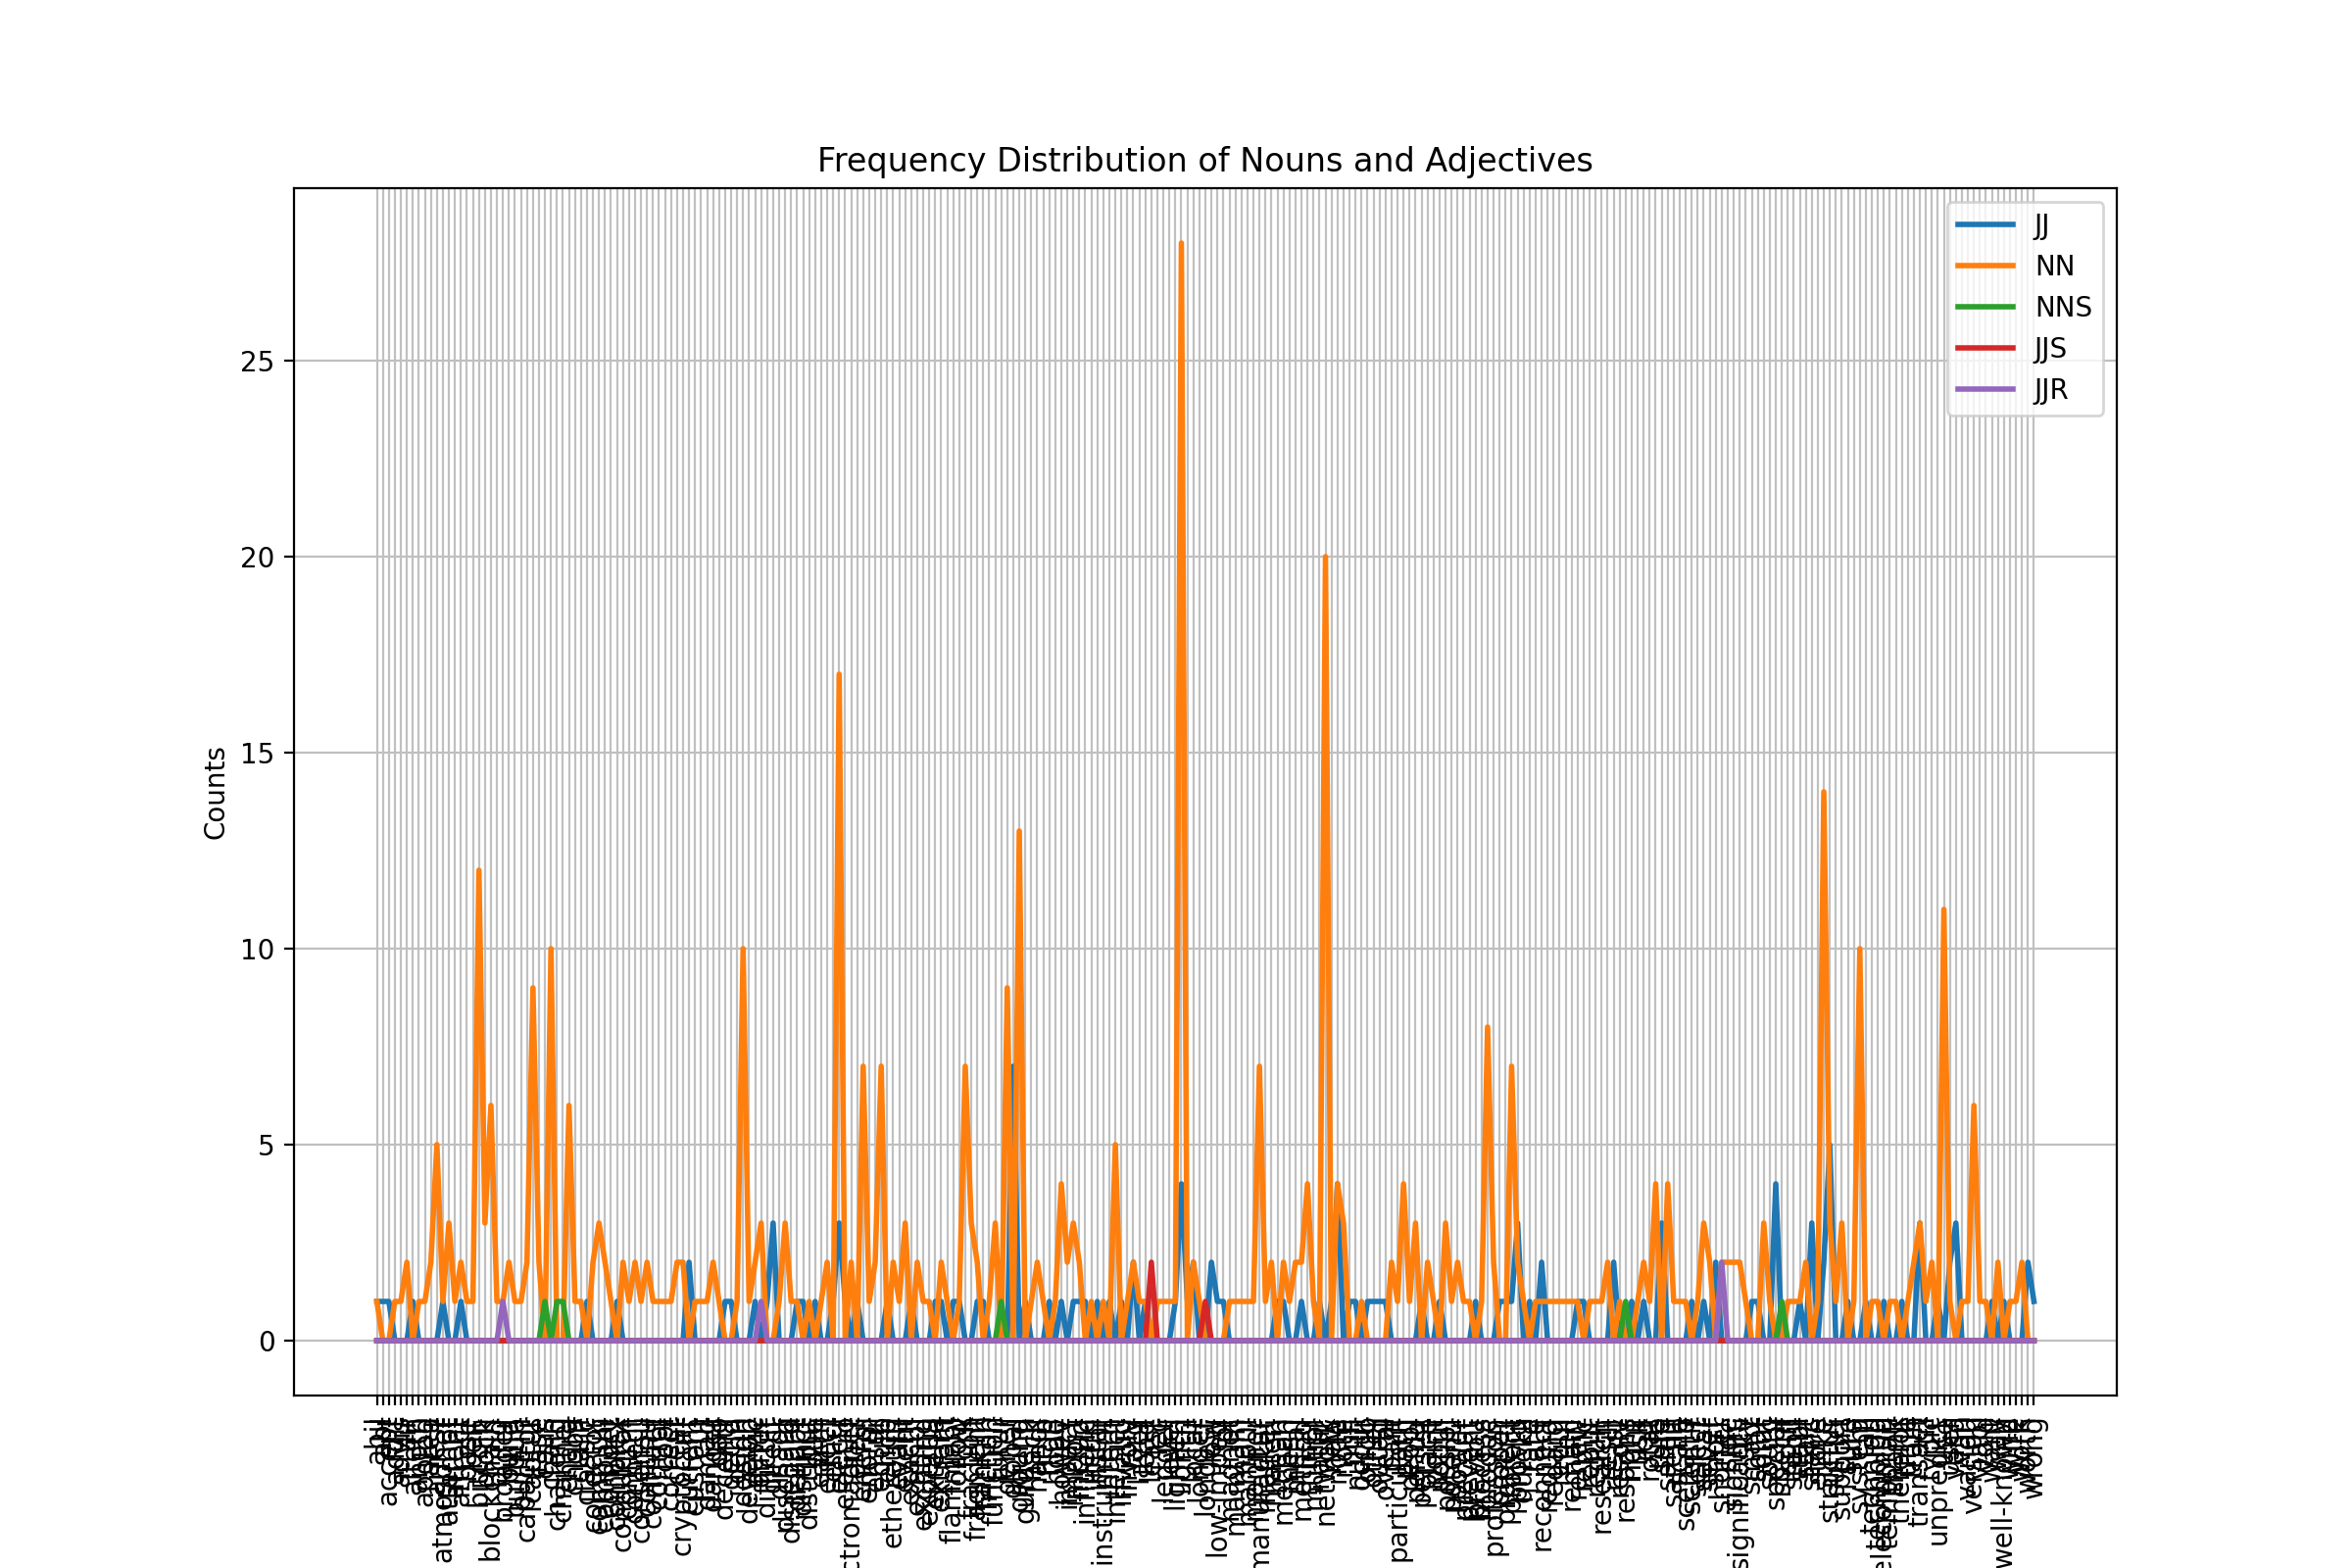

In [52]:
# Create a list of all the words in the corpus tagged with their part of speech
# %matplotlib notebook
tagged_corpus = nltk.pos_tag(stemmed_tokens)

# Create a conditional frequency distribution of nouns and adjectives in the corpus
cfd = nltk.ConditionalFreqDist((tag, word.lower()) for (word, tag) in tagged_corpus if tag.startswith('N') or tag.startswith('J'))

# Plot the frequency of the top 20 nouns and adjectives
plt.figure(figsize=(12, 8))
# cfd.plot(20, title='Frequency Distribution of Nouns and Adjectives')
cfd.plot(samples=list(filter(lambda x: x[1] in {'NN', 'NNS', 'NNP', 'NNPS', 'JJ', 'JJR', 'JJS'}, cfd.conditions())), title='Frequency Distribution of Nouns and Adjectives')
plt.show()

<IPython.core.display.Javascript object>


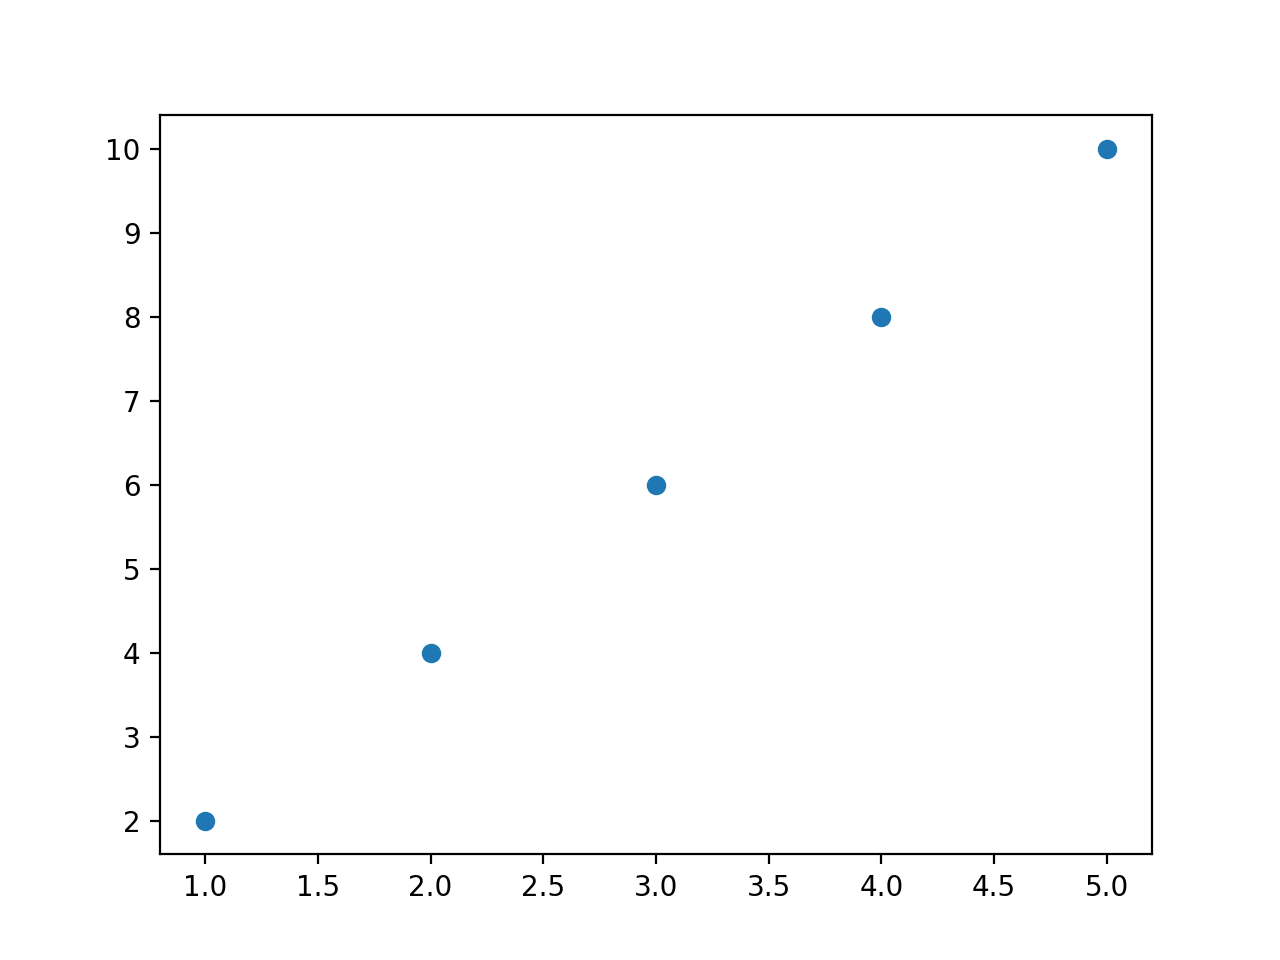

In [49]:
import matplotlib.pyplot as plt
%matplotlib notebook

x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

fig, ax = plt.subplots()
ax.scatter(x, y)

plt.show()

In [12]:
# from nltk.probability import ConditionalFreqDist
# from nltk.corpus import brown
# import matplotlib.pyplot as plt

# # Load the Brown corpus and tag it with parts of speech
# corpus = brown.tagged_words(categories='news')

# # Extract the word and part of speech from each token
# word_pos_pairs = [(word.lower(), pos) for (word, pos) in corpus]

# # Create a conditional frequency distribution of words by part of speech
# cfd = ConditionalFreqDist(word_pos_pairs)

# # Plot the frequency of the top 20 words for each part of speech
# plt.figure(figsize=(12, 8))
# cfd.plot(1, title='Frequency Distribution of Words by Part of Speech')
# plt.show()

In [74]:
import plotly.graph_objs as go
from plotly.offline import iplot
import pandas as pd

df = pd.DataFrame({'x': [1, 2, 3, 4, 5], 'y': [2, 4, 6, 8, 10]})

data = [go.Scatter(x=df['x'], y=df['y'], mode='markers')]

iplot(data)

In [71]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Get the top 20 words and their frequencies
top_words = [word for word, freq in fdist.most_common(20)]
top_freqs = [freq for word, freq in fdist.most_common(20)]

# Create a subplots figure with one bar chart and one scatter plot
fig = make_subplots(rows=1, cols=2, specs=[[{}, {"type": "scatter"}]])

# Add the bar chart of the top 20 words and their frequencies
fig.add_trace(
    go.Bar(x=top_words, y=top_freqs),
    row=1,
    col=1
)

# Define the click event for the scatter plot
def scatter_click(trace, points, state):
    # Get the word at the selected point
    word = points.point_inds[0]

    # Create a frequency distribution of the word's context words
    cfd = nltk.ConditionalFreqDist(nltk.bigrams(words))
    context_words = [word.lower() for word in cfd[word].most_common(20)]

    # Update the x-axis and y-axis of the scatter plot with the context words
    fig.update_traces(x=[context_words], y=[list(range(1, len(context_words) + 1))], selector=dict(type='scatter'))

# Add the scatter plot of the selected word's context words
fig.add_trace(
    go.Scatter(x=[], y=[], mode="markers+text", marker={"size": 10}),
    row=1,
    col=2
)

# Set the click event for the scatter plot
fig.data[1].on_click(scatter_click)

# Set the layout for the figure
fig.update_layout(
    title="Interactive NLTK Plot",
    xaxis_title="Words",
    yaxis_title="Frequency",
    height=500,
    width=1000,
    showlegend=False
)

# Show the figure
fig.show()

In [62]:
from nltk import pos_tag
# nltk.download('averaged_perceptron_tagger')


In [61]:
def interactive_noun_adjective_plot(text):
    # Tokenize the text into words
    words = nltk.word_tokenize(text)
    
    # Tag the words with their parts of speech
    tagged_words = pos_tag(words)
    
    # Filter out all but nouns and adjectives
    nouns_and_adjectives = [word for word, pos in tagged_words if pos.startswith('N') or pos.startswith('J')]
    
    # Calculate the frequency distribution of the nouns and adjectives
    fdist = FreqDist(nouns_and_adjectives)
    
    # Create a dictionary to store the counts for each tag
    tag_counts = {}
    
    # Loop through the tagged words and add up the counts for each tag
    for word, tag in tagged_words:
        if tag not in tag_counts:
            tag_counts[tag] = 0
        tag_counts[tag] += 1
    
    # Create a list of the unique tags in the text
    tags = list(tag_counts.keys())
    
    # Create a subplot with two bar charts
    fig = make_subplots(rows=1, cols=2, subplot_titles=('Frequency Distribution of Nouns and Adjectives', 'Counts by Tag'))
    
    # Create the bar chart of the noun and adjective frequencies
    fig.add_trace(go.Bar(x=list(fdist.keys()), y=list(fdist.values()), name='Frequency'), row=1, col=1)
    
    # Create the bar chart of the tag counts
    fig.add_trace(go.Bar(x=tags, y=[tag_counts[tag] for tag in tags], name='Counts'), row=1, col=2)
    
    # Add hover text to the noun and adjective bar chart
    fig.data[0].hovertemplate = 'Word: %{x}<br>Count: %{y}<extra></extra>'
    
    # Add a click event to the noun and adjective bar chart
    fig.data[0].on_click(lambda trace, points, state: fig.update_traces(selected={'marker': {'color': 'red'}}) if points else fig.update_traces(selected=None))
    
    # Add a hover event to the tag count bar chart
    fig.data[1].on_hover(lambda trace, points, state: fig.update_layout(title=f'Counts by Tag: {points.point_data[0]["x"]} ({points.point_data[0]["y"]})') if points else fig.update_layout(title='Counts by Tag'))
    
    # Set the layout options for the figure
    fig.update_layout(height=600, width=1000, title='Interactive Noun and Adjective Plot')
    
    return fig

In [72]:
fig = interactive_noun_adjective_plot(text)
fig.show()

In [73]:
# Get word lengths for each word in the Brown corpus
word_lengths = [len(w) for w in stemmed_tokens]

# Create a violin plot of the word lengths
plt.figure(figsize=(8, 6))
plt.violinplot(word_lengths, vert=False)
plt.title('Distribution of Word Lengths in the Brown Corpus')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.show()

<IPython.core.display.Javascript object>

In [17]:
import seaborn as sns

# Tokenize the text into words
words = nltk.word_tokenize(text)

# Tag the words with their parts of speech
tagged_words = nltk.pos_tag(words)

# Create a frequency distribution of the words
fdist = nltk.FreqDist(words)

# Create a conditional frequency distribution of nouns and verbs
cfdist = nltk.ConditionalFreqDist((tag, word) for (word, tag) in tagged_words if tag.startswith('N') or tag.startswith('V'))

# Create a list of frequency levels to plot
freq_levels = [10, 50, 100, 200]

# Create a dictionary to store the densities for each category
densities = {}

# Calculate the densities for each category at each frequency level
for tag in cfdist.conditions():
    freq_dist = cfdist[tag]
    density = []
    for level in freq_levels:
        words = [word for word in freq_dist if freq_dist[word] >= level]
        density.append(len(words))
    densities[tag] = density

# Convert the dictionary of densities to a dataframe
df = pd.DataFrame(densities, index=freq_levels)

# Create the density heat map using Seaborn
sns.kdeplot(data=df.T, cmap='Blues', shade=True, bw_adjust=0.5)

# Set the axis labels and title
plt.xlabel('Frequency')
plt.ylabel('Part of Speech')
plt.title('Density Heat Map of Nouns and Verbs')

NameError: name 'pd' is not defined

In [10]:
import json
data = {'tokens': tokens, 'stemmed_tokens': filtered_stemmed_tokens}
json_data = json.dumps(data)

In [13]:

# from flask import Flask, jsonify, render_template

# app = Flask(__name__)

# @app.route('/')
# def index():
#     return render_template('index.html', data=json_data)

# if __name__ == '__main__':
#     app.run(debug=True)